In [1]:
from utils import make_roc_curve, make_cm, sigmoid, bootstrap, get_stats
from sklearn import metrics
import pandas as pd
manifest = pd.read_csv('/workspace/data/drives/sde/amey_mitral_regurg_weights/MR_manifest_nov21_resplit/data/test_predictions_lowest_loss.csv')
cols = ['Control_preds','Mild_preds','Moderate_preds','Severe_preds']

for i in cols:
    manifest[i] = manifest[i].apply(sigmoid)

manifest['predicted'] = manifest[cols].idxmax(axis = 1).astype(str).str.slice(stop = -6)

manifest['severe_binary'] = (manifest['final_class'].isin(['Severe'])*1)
manifest['severe_binary_pred'] = (manifest['predicted'].isin(['Severe'])*1)
manifest['mod_severe_binary'] = (manifest['final_class'].isin(['Moderate','Severe'])*1)
manifest['mod_severe_binary_pred'] = (manifest['predicted'].isin(['Moderate','Severe'])*1)
manifest['control_mild_binary'] = (manifest['final_class'].isin(['Control','Mild'])*1)
manifest['control_mild_binary_pred'] = (manifest['predicted'].isin(['Control','Mild'])*1)
manifest['moderate_binary'] = (manifest['final_class'].isin(['Moderate'])*1)
manifest['moderate_binary_pred'] = (manifest['predicted'].isin(['Moderate'])*1)

manifest['not_severe_binary'] = (~manifest['final_class'].isin(['Severe'])*1)
manifest['not_severe_binary_pred'] = (~manifest['predicted'].isin(['Severe'])*1)

manifest['Mod_Severe_preds'] = manifest[['Moderate_preds','Severe_preds']].max(axis = 1, skipna = True)

/opt/conda/lib/python3.8/site-packages/apex/pyprof/__init__.py:5: FutureWarning: pyprof will be removed by the end of June, 2022
  warnings.warn("pyprof will be removed by the end of June, 2022", FutureWarning)


In [2]:
get_stats(manifest)

Severe MR Stats



100%|██████████| 10000/10000 [00:11<00:00, 841.14it/s]


Severe MR AUC is 0.934 [0.913, 0.952]


100%|██████████| 10000/10000 [00:40<00:00, 246.85it/s]


Severe PPV is 0.626 [0.537, 0.714]
Severe NPV is 0.954 [0.939, 0.966]
Severe Recall is 0.626 [0.536, 0.712]
Severe F1-Score is 0.626 [0.55, 0.697]
Moderate/Severe MR Stats /n


100%|██████████| 10000/10000 [00:11<00:00, 842.47it/s]


TypeError: can only concatenate str (not "list") to str

In [4]:
str(bootstrap((manifest.final_class == 'Severe') * 1, manifest.Severe_preds))

100%|██████████| 10000/10000 [00:12<00:00, 827.01it/s]


'[0.913, 0.952]'

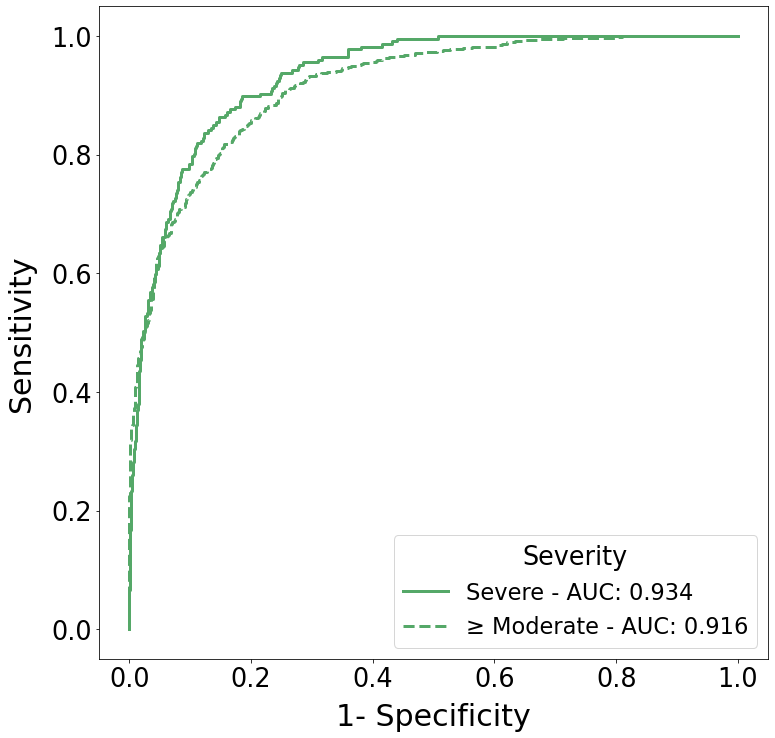

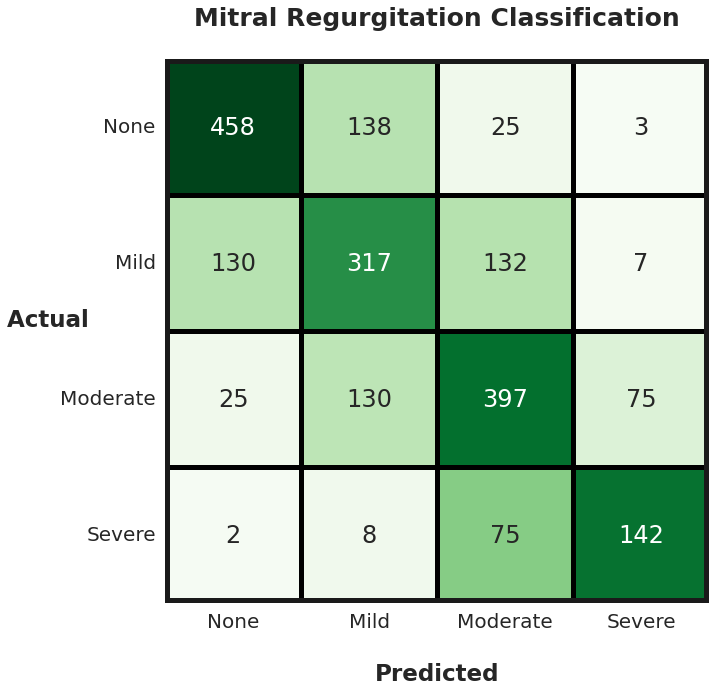

In [2]:
make_roc_curve(manifest)
make_cm(manifest)

In [4]:
### Severe

print('Severe PPV is ' + str(round(metrics.precision_score(manifest['severe_binary'], manifest['severe_binary_pred'],
                       labels = ['Severe']),3)))

print('Severe NPV is ' + str(round(metrics.precision_score(manifest['not_severe_binary'], manifest['not_severe_binary_pred'],
                       labels = ['Severe']),3)))

print('Severe Recall is ' + str(round(metrics.recall_score(manifest['severe_binary'], manifest['severe_binary_pred'],
                       labels = ['Severe']),3)))

print('Severe F1-Score is ' + str(round(metrics.f1_score(manifest['severe_binary'], manifest['severe_binary_pred'],
                       labels = ['Severe']),3)) + '\n')



### Moderate/Severe

print('Moderate/Severe PPV is ' + str(round(metrics.precision_score(manifest['mod_severe_binary'], manifest['mod_severe_binary_pred'],
                       labels = ['Moderate/Severe']),3)))

print('Moderate/Severe NPV is ' + str(round(metrics.precision_score(manifest['control_mild_binary'], manifest['control_mild_binary_pred'],
                       labels = ['Moderate/Severe']),3)))

print('Moderate/Severe Recall is ' + str(round(metrics.recall_score(manifest['mod_severe_binary'], manifest['mod_severe_binary_pred'],
                       labels = ['Moderate/Severe']),3)))

print('Moderate/Severe F1-Score is ' + str(round(metrics.f1_score(manifest['mod_severe_binary'], manifest['mod_severe_binary_pred'],
                       labels = ['Moderate/Severe']),3)))

Severe PPV is 0.626
Severe NPV is 0.954
Severe Recall is 0.626
Severe F1-Score is 0.626

Moderate/Severe PPV is 0.805
Moderate/Severe NPV is 0.863
Moderate/Severe Recall is 0.807
Moderate/Severe F1-Score is 0.806


In [10]:
bootstrap((manifest.final_class == 'Severe') * 1, manifest.Severe_preds)

100%|██████████| 10000/10000 [00:12<00:00, 796.24it/s]


[0.913, 0.952]

In [12]:
bootstrap(manifest.final_class.isin(['Moderate','Severe']) * 1,
 manifest[['Moderate_preds','Severe_preds']].max(axis = 1))

100%|██████████| 10000/10000 [00:12<00:00, 823.57it/s]


[0.9, 0.932]